In [2]:
import pandas as pd
import numpy as np
idx = pd.date_range(start="1/1/2022", end="12/31/2024", freq="D")
idx

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10',
               ...
               '2024-12-22', '2024-12-23', '2024-12-24', '2024-12-25',
               '2024-12-26', '2024-12-27', '2024-12-28', '2024-12-29',
               '2024-12-30', '2024-12-31'],
              dtype='datetime64[ns]', length=1096, freq='D')

In [3]:
t=pd.Series(range(0,len(idx)), index=idx,name="day")
t

2022-01-01       0
2022-01-02       1
2022-01-03       2
2022-01-04       3
2022-01-05       4
              ... 
2024-12-27    1091
2024-12-28    1092
2024-12-29    1093
2024-12-30    1094
2024-12-31    1095
Freq: D, Name: day, Length: 1096, dtype: int64

In [4]:
import numpy as np
annuel=np.cos(2 * np.pi * t/365)
cycle_unitaire=np.cos(2 * np.pi * t/(len(t)*1.5))
bi_mestrielle=np.cos(2 * np.pi * t/60)
fuite=t/60
fuite.iloc[60:]=0

Text(0.5, 1.0, 'série temporelle')

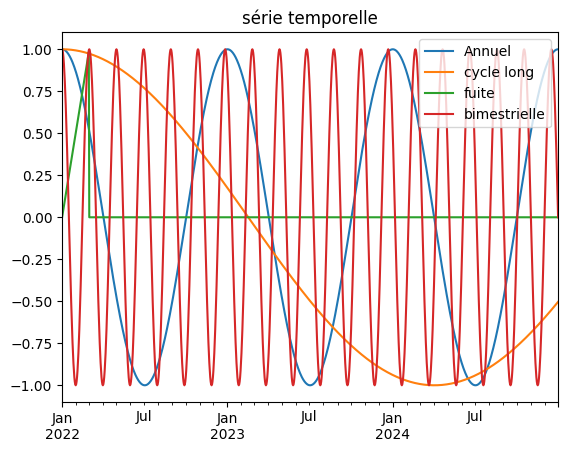

In [5]:
import matplotlib.pyplot as plt
annuel.plot(label="Annuel", legend=True)
cycle_unitaire.plot(label="cycle long", legend=True)
fuite.plot(label="fuite", legend=True)
bi_mestrielle.plot(label="bimestrielle", legend=True)
plt.title("série temporelle")

In [6]:
def calcul_spectre(s):
    '''
    cette fonction retourne la décomposition spectrale d'une série temporelle
    argument : série temporelle à décomposée
    return : série de l'amplitude du spectre FFT, index = période spectrale (1/fréquence)
    '''
    N = len(s)                     # nombre de points
    Y = np.fft.fft(s.values)       # coefficients FFT
    freqs = np.fft.fftfreq(N, 1)  # fréquences en cycles / jour
    mask=freqs>0
    spectre=pd.DataFrame({'periode':(1/freqs[mask]).astype(int),'amplitude':abs(Y[mask].real)}).groupby('periode').agg(amplitude=("amplitude","sum"))
    return spectre

In [7]:
spectre=pd.concat([calcul_spectre(annuel),calcul_spectre(cycle_unitaire),calcul_spectre(fuite),calcul_spectre(bi_mestrielle)], axis=1)
spectre.columns=["annuel","cycle long","fuite", "bimestrielle"]

Text(0.5, 1.0, 'spectre FFT')

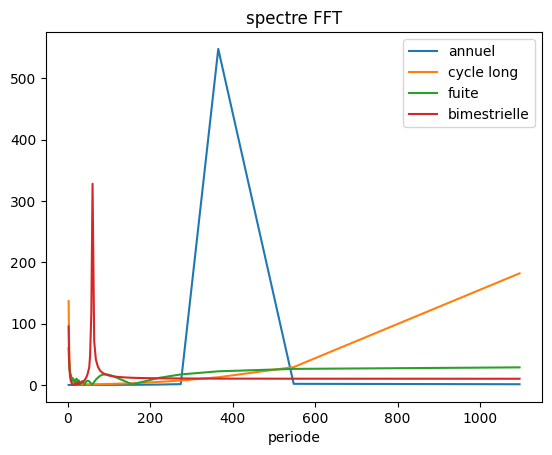

In [8]:
spectre.plot()
plt.title("spectre FFT")

In [12]:
nbre_cycle=np.arange(1,1096/2)

In [13]:
freqs=nbre_cycle/1096

In [14]:
periode=1/freqs

Text(0, 0.5, 'Nombre de fréquences')

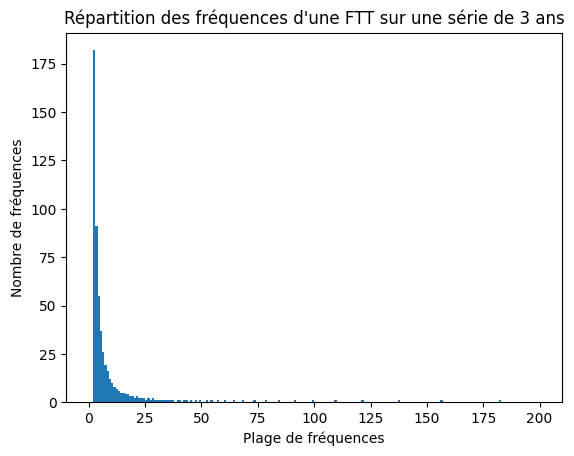

In [27]:
import matplotlib.pyplot as plt
plt.hist(periode, range=(0,200), bins=200)
plt.title("Répartition des fréquences d'une FTT sur une série de 3 ans")
plt.xlabel("Plage de fréquences")
plt.ylabel("Nombre de fréquences")


Pour la détection des saisonnalités, nous utilisons la Fast Fourier Transformation (FFT) pour identifier les fréquences fondamentales du signal.
Toutefois, la FFT décompose les composantes fondamentales en harmonique au-delà de période vibratoire supérieure à 20 % de la taille de la série. Sur une série de 3 ans, elle identifiera correctement les fréquences fondamentales entre 25 et 200 jours.